**Importing Libraries**

In [220]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder


**Load Dataset from gtihub Repo**

In [221]:
train = pd.read_csv ("https://raw.githubusercontent.com/shubhammachal/Colab/main/train.csv")
test = pd.read_csv("https://raw.githubusercontent.com/shubhammachal/Colab/main/test.csv")
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [222]:
train_length = len(train)
train_length

891

**Heatmap visualization of data correlation using seaborn**

<ipython-input-223-14900aae5c02>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(train.corr(), annot = True, cmap = 'BrBG')


<Axes: >

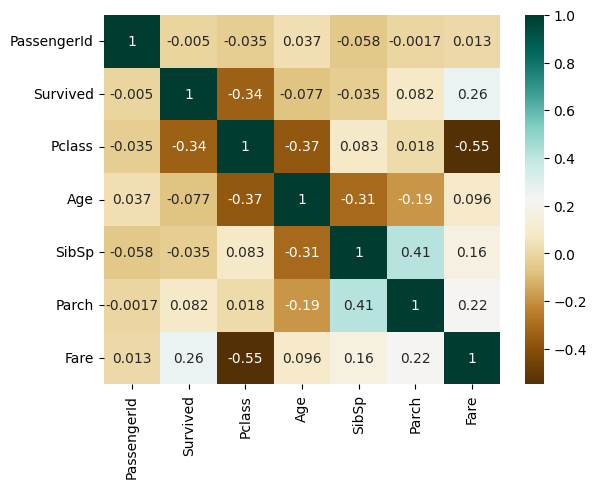

In [223]:
sns.heatmap(train.corr(), annot = True, cmap = 'BrBG')

**Correlation matrix**

In [224]:
train.corr()

<ipython-input-224-0bc27f030cd9>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  train.corr()


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


In [225]:
df = pd.concat([train,test],axis = 0)
df = df.reset_index(drop = True)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [226]:
df.shape

(1309, 12)

In [227]:
df.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

In [228]:
df.drop(columns = ['Cabin'], axis = 1, inplace = True)

In [229]:
df['Age'].fillna(df['Age'].mean(), inplace = True)
df['Fare'].fillna(df['Fare'].mean(), inplace = True)
df.isnull().sum()

PassengerId      0
Survived       418
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         2
dtype: int64

<Axes: xlabel='Fare', ylabel='Count'>

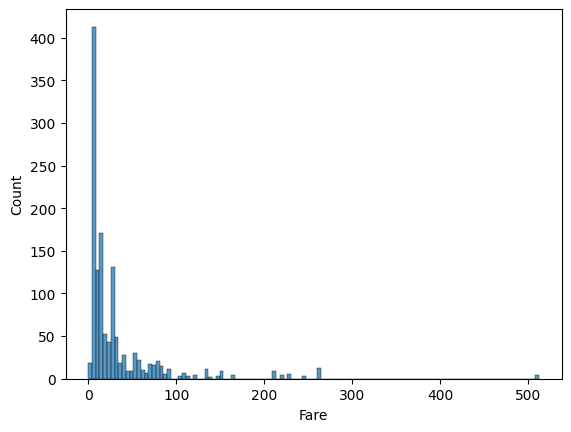

In [230]:
sns.histplot(df['Fare'])

<Axes: xlabel='Fare', ylabel='Count'>

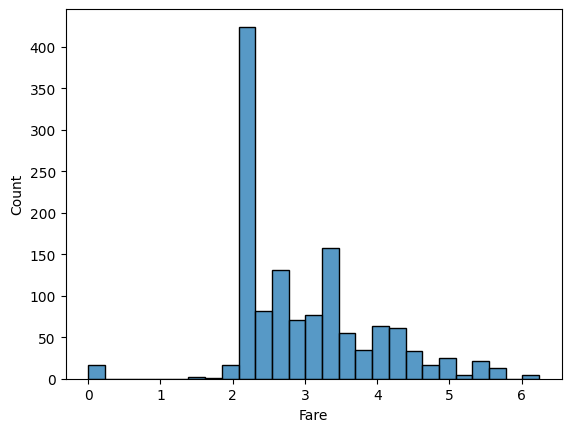

In [231]:
df['Fare'] = np.log(df['Fare']+1)
sns.histplot(df['Fare'])

<Axes: xlabel='Age', ylabel='Count'>

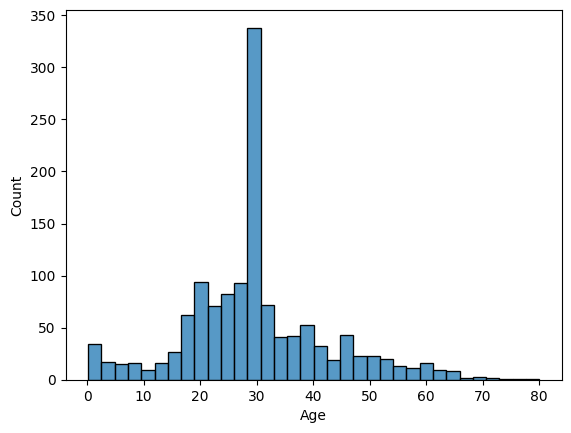

In [232]:
sns.histplot(df['Age'])

In [233]:
df.drop(columns = ['Name','Ticket'], axis =1 , inplace = True)

In [234]:
df

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0.0,3,male,22.000000,1,0,2.110213,S
1,2,1.0,1,female,38.000000,1,0,4.280593,C
2,3,1.0,3,female,26.000000,0,0,2.188856,S
3,4,1.0,1,female,35.000000,1,0,3.990834,S
4,5,0.0,3,male,35.000000,0,0,2.202765,S
...,...,...,...,...,...,...,...,...,...
1304,1305,NaN,3,male,29.881138,0,0,2.202765,S
1305,1306,NaN,1,female,39.000000,0,0,4.699571,C
1306,1307,NaN,3,male,38.500000,0,0,2.110213,S
1307,1308,NaN,3,male,29.881138,0,0,2.202765,S


In [235]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
cols = ['Sex', 'Embarked']
for col in cols:
  df[col] = le.fit_transform(df[col])
df.head()


,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0.0,3,1,22.0,1,0,2.110213,2
1,2,1.0,1,0,38.0,1,0,4.280593,0
2,3,1.0,3,0,26.0,0,0,2.188856,2
3,4,1.0,1,0,35.0,1,0,3.990834,2
4,5,0.0,3,1,35.0,0,0,2.202765,2


In [236]:
train = df.iloc[:train_length,:]
test= df.iloc[train_length:, :]

In [237]:
test.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
891,892,NaN,3,1,34.5,0,0,2.178064,1
892,893,NaN,3,0,47.0,1,0,2.079442,2
893,894,NaN,2,1,62.0,0,0,2.369075,1
894,895,NaN,3,1,27.0,0,0,2.268252,2
895,896,NaN,3,0,22.0,1,1,2.586824,2


In [238]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0.0,3,1,22.0,1,0,2.110213,2
1,2,1.0,1,0,38.0,1,0,4.280593,0
2,3,1.0,3,0,26.0,0,0,2.188856,2
3,4,1.0,1,0,35.0,1,0,3.990834,2
4,5,0.0,3,1,35.0,0,0,2.202765,2


In [239]:
y = train['Survived']

In [243]:
X = train.drop(columns = ['PassengerId', 'Survived'], axis = 1)

In [244]:
X.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,22.0,1,0,2.110213,2
1,1,0,38.0,1,0,4.280593,0
2,3,0,26.0,0,0,2.188856,2
3,1,0,35.0,1,0,3.990834,2
4,3,1,35.0,0,0,2.202765,2


In [246]:
y.tail()

886    0.0
887    1.0
888    0.0
889    1.0
890    0.0
Name: Survived, dtype: float64

In [259]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)


331    0.0
733    0.0
382    0.0
704    0.0
813    0.0
      ... 
106    1.0
270    0.0
860    0.0
435    1.0
102    0.0
Name: Survived, Length: 712, dtype: float64

In [261]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
clf.fit(X_train, y_train)



LogisticRegression()

In [264]:
y_test

709    1.0
439    0.0
840    0.0
720    1.0
39     1.0
      ... 
433    0.0
773    0.0
25     1.0
84     1.0
10     1.0
Name: Survived, Length: 179, dtype: float64

In [268]:
y_pred= clf.predict(X_test)

In [269]:
y_pred

array([0., 0., 0., 1., 1., 1., 1., 0., 1., 1., 0., 0., 0., 0., 0., 1., 0.,
       1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 1., 1., 1.,
       0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1.,
       1., 0., 1., 0., 1., 0., 1., 1., 1., 0., 1., 1., 0., 0., 1., 0., 0.,
       0., 1., 1., 1., 1., 1., 0., 0., 1., 1., 1., 1., 0., 1., 1., 0., 0.,
       0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       1., 0., 0., 0., 1., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 1.,
       0., 0., 1., 1., 0., 0., 0., 1., 1., 1., 0., 1., 0., 0., 1., 0., 1.,
       1., 0., 0., 1., 0., 1., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0.,
       1., 0., 0., 0., 1., 1., 1., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0.,
       1., 1., 0., 1., 0., 0., 0., 1., 1.])

In [270]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.7988826815642458

In [273]:
from lightgbm import LGBMClassifier
clf = LGBMClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy_score(y_pred, y_test)

[LightGBM] [Info] Number of positive: 268, number of negative: 444
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000375 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 196
[LightGBM] [Info] Number of data points in the train set: 712, number of used features: 7
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.376404 -> initscore=-0.504838
[LightGBM] [Info] Start training from score -0.504838
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


0.8212290502793296

In [276]:
from lightgbm import LGBMClassifier
clf = LGBMClassifier()
clf.fit(X,y)


[LightGBM] [Info] Number of positive: 342, number of negative: 549
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000174 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 223
[LightGBM] [Info] Number of data points in the train set: 891, number of used features: 7
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.383838 -> initscore=-0.473288
[LightGBM] [Info] Start training from score -0.473288
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


LGBMClassifier()

In [277]:
test

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
891,892,NaN,3,1,34.500000,0,0,2.178064,1
892,893,NaN,3,0,47.000000,1,0,2.079442,2
893,894,NaN,2,1,62.000000,0,0,2.369075,1
894,895,NaN,3,1,27.000000,0,0,2.268252,2
895,896,NaN,3,0,22.000000,1,1,2.586824,2
...,...,...,...,...,...,...,...,...,...
1304,1305,NaN,3,1,29.881138,0,0,2.202765,2
1305,1306,NaN,1,0,39.000000,0,0,4.699571,0
1306,1307,NaN,3,1,38.500000,0,0,2.110213,2
1307,1308,NaN,3,1,29.881138,0,0,2.202765,2


In [278]:
X_test = test.drop(columns = ['PassengerId', 'Survived'], axis = 1)

In [280]:
prediction = clf.predict(X_test)
prediction

array([0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 1., 1., 0.,
       1., 1., 1., 0., 0., 1., 1., 1., 0., 1., 1., 1., 0., 0., 0., 0., 0.,
       1., 0., 0., 0., 0., 1., 0., 1., 0., 1., 1., 0., 0., 0., 1., 1., 1.,
       0., 1., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1., 1., 1., 0.,
       0., 1., 1., 0., 0., 0., 1., 1., 0., 1., 0., 1., 1., 0., 0., 0., 0.,
       0., 1., 1., 1., 1., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 1., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 0., 0., 1., 1.,
       1., 1., 0., 1., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 1., 0., 1., 0., 0.,
       0., 0., 0., 1., 0., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 1., 0.,
       0., 1., 0., 0., 0., 1., 1., 0., 1., 1., 0., 0., 1., 0., 1., 0., 1.,
       0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 1., 1., 0., 1.,
       0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 1., 0., 1., 0., 1.,
       0., 1., 0., 1., 0.

In [282]:
submission = pd.read_csv("https://raw.githubusercontent.com/shubhammachal/Colab/main/gender_submission.csv")
submission

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [287]:
submission['Survived'] = prediction
submission['Survived'] = submission['Survived'].astype('int')

In [288]:
submission.to_csv ('submission.csv', index= False)